Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    np.random.seed(1)
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    np.random.seed(1)
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

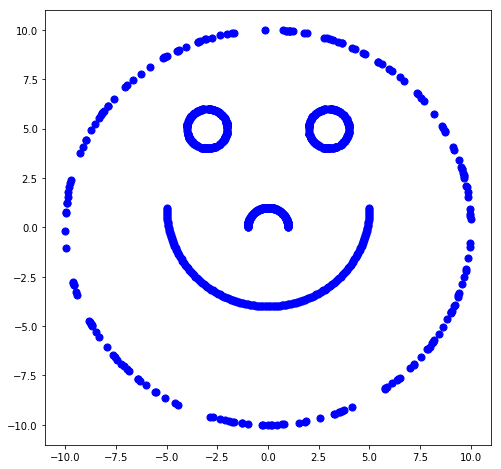

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

### Part (a)

In this part we were asked to implement the k-means algorithm on this dataset. I have chosen the value of clusters to be one of 3, 5 or 7 here for demonstration. I will later compare different number of clusters and choose the number which is the best for clustering this. 

In [4]:
## Implementing k-means to cluster the dataset

class K_means:
    
    ## Initialising the class
    def __init__(self, k = 5, tol = 1e-8, max_iter = 5000):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        
    ## Function for training
    def fit(self, X):
        np.random.seed(1)
        n = X.shape[0]
        
        ## Array to store the initial means
        means = []
        
        ## Doing initial assignments randomly
        for i in range(self.k):
            mu_i = 20*np.random.rand(2) - 10
            means.append((mu_i[0], mu_i[1]))
        
        ## Array to store the initial means assignment
        initial_means = means.copy()
        
        diff = 100
        iters = 0
        
        ## Array to store the assignment of data points to cluster
        assignments = -1*np.ones(n)
        
        while (diff > self.tol and iters < self.max_iter):
            iters = iters + 1
            
            ## Iterating over each data point and assigning clusters
            for i in range(n):
                curr = X[i]
                minn = 1e9
                min_k = -1
                
                ## Finding the cluster mean which is nearest to this datapoint
                for j in range(self.k):
                    dist = (curr[0] - means[j][0])**2 + (curr[1] - means[j][1])**2 
                    if dist < minn:
                        minn = dist
                        min_k = j
                
                assignments[i] = min_k
            
            ## Updating previous means
            prev_means = means.copy()
            
            for i in range(self.k):
                sum_x = 0 
                sum_y = 0
                num = 0
                
                for j in range(n):
                    if assignments[j] == i:
                        sum_x = sum_x + X[j][0]
                        sum_y = sum_y + X[j][1]
                        num = num + 1
                        
                means[i] = (sum_x / num, sum_y / num)
                
            ## Checking for convergence
            diff = 0
            for i in range(self.k):
                diff = diff + (means[i][0] - prev_means[i][0])**2 + (means[i][1] - prev_means[i][1])**2 
            
            diff = np.sqrt(diff)
        
        ## Saving final means and assignmentes obtained 
        self.means = means
        self.assignments = assignments
        return (initial_means, means, assignments)
    
    ## Function to compute the loss of clustering 
    def loss(self, X):
        loss = 0
        n = X.shape[0]
        k = self.k 
        
        ## Calculating the loss
        for i in range(n):
            mu_x = self.means[int(self.assignments[i])][0]
            mu_y = self.means[int(self.assignments[i])][1]
            
            loss = loss + (X[i][0] - mu_x)**2 + (X[i][1] - mu_y)**2
        
        return loss

16720.38243791178


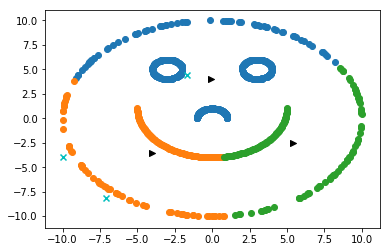

In [5]:
## Performing simple k-means with k = 3
np.random.seed(10)
k = 3

## Initialising the K_means class
cluster = K_means(k = 3)

## Training the cluster class  
result = cluster.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "c")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

8237.183439630311


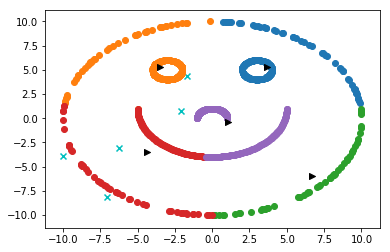

In [6]:
## Performing simple k-means with k = 5
np.random.seed(10)
k = 5

## Initialising the K_means class
cluster = K_means()

## Training the cluster class  
result = cluster.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "c")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

6370.989689743807


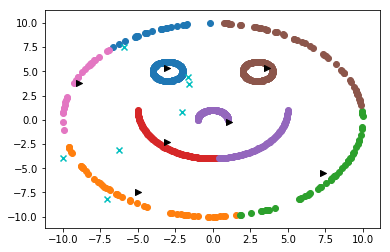

In [7]:
## Performing simple k-means with k = 5
np.random.seed(10)
k = 7

## Initialising the K_means class
cluster = K_means(k = 7)

## Training the cluster class  
result = cluster.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "c")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

In the above visualisation, the different clusters obtained using K-means are represented with different colors. The means are shown with black triangle marker and the initial means are shown with a x mark, we can see the initialisation of mean is not where they should have been. We can observe clearly that since the simple K-means algorithm searches for a linear decision boundary it is unable to work for this example. 

### Part (b)

In this part, we were asked to write the code for Kmeans++. The only difference will be in the initialisation step. I have implemented the algorithm for 3, 5 and 7 clusters below but we will see the cluster number which works the best for this dataset. 

In [8]:
## Implementing k-means++ to cluster the dataset

class K_means_plus:
    
    ## Initialising the class
    def __init__(self, k = 5, tol = 1e-8, max_iter = 5000):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        
    ## Function for training
    def fit(self, X):
        np.random.seed(1)
        n = X.shape[0]
        
        ## Array to store the initial means
        means = []
        
        ## Doing assignments according to kmeans++ rule
        rnd = X[np.random.choice(np.arange(n))]
        means.append((rnd[0], rnd[1]))
                
        ## Array to store the distances
        distances = 1e9*np.ones((n, self.k))
        for i in range(1, self.k):
            probs = [] ## Array to store the probabilities associated with choosing each point
            
            ## Computing the distances of every datapoint with the most recent cluster mean
            for j in range(n):
                curr = X[j]
                dist = (curr[0] - means[i-1][0])**2 + (curr[1] - means[i-1][1])**2
                distances[j][i-1] = dist
                min_dist = np.min(distances[j])
                probs.append(min_dist)
                
            probs = probs / (np.sum(probs))
            
            ## Choosing the next mean according to the K-means++ rule
            next_rnd = X[np.random.choice(np.arange(n), p = probs)]
            means.append((next_rnd[0], next_rnd[1]))
        
        ## Array to store the initial means assignment
        initial_means = means.copy()
        
        diff = 100
        iters = 0
        
        ## Array to store the assignment of data points to cluster
        assignments = -1*np.ones(n)
        
        while (diff > self.tol and iters < self.max_iter):
            iters = iters + 1
            
            ## Iterating over each data point and assigning clusters
            for i in range(n):
                curr = X[i]
                minn = 1e9
                min_k = -1
                
                ## Finding the cluster mean which is nearest to this datapoint
                for j in range(self.k):
                    dist = (curr[0] - means[j][0])**2 + (curr[1] - means[j][1])**2 
                    if dist < minn:
                        minn = dist
                        min_k = j
                
                assignments[i] = min_k
            
            ## Updating previous means
            prev_means = means.copy()
            
            for i in range(self.k):
                sum_x = 0 
                sum_y = 0
                num = 0
                
                for j in range(n):
                    if assignments[j] == i:
                        sum_x = sum_x + X[j][0]
                        sum_y = sum_y + X[j][1]
                        num = num + 1
                        
                means[i] = (sum_x / num, sum_y / num)
            
            ## Checking for convergence
            diff = 0
            for i in range(self.k):
                diff = diff + (means[i][0] - prev_means[i][0])**2 + (means[i][1] - prev_means[i][1])**2
                
            diff = np.sqrt(diff)
            
        ## Saving final means and assignmentes obtained
        self.means = means
        self.assignments = assignments
        return (initial_means, means, assignments)
    
    ## Function to compute the loss of clustering 
    def loss(self, X):
        loss = 0
        n = X.shape[0]
        k = self.k 
        
        ## Calculating the loss
        for i in range(n):
            mu_x = self.means[int(self.assignments[i])][0]
            mu_y = self.means[int(self.assignments[i])][1]
            
            loss = loss + (X[i][0] - mu_x)**2 + (X[i][1] - mu_y)**2

        return loss

6370.989689743807


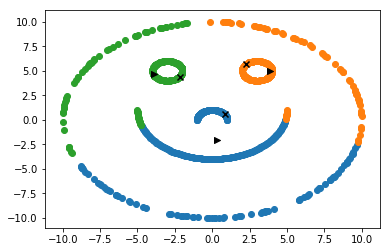

In [9]:
## Visualising kmeans++ for k = 3

np.random.seed(10)
k = 3

## Initialising the K_means++ class
cluster_plus = K_means_plus(k = 3)

## Training the cluster class 
result = cluster_plus.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "black")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

6370.989689743807


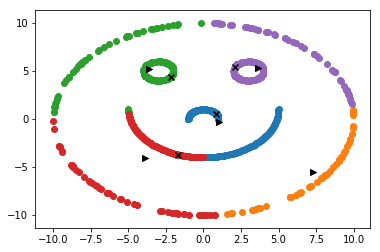

In [10]:
## Visualising kmeans++ for k = 5

np.random.seed(10)
k = 5

## Initialising the K_means++ class
cluster_plus = K_means_plus()

## Training the cluster class 
result = cluster_plus.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "black")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

6370.989689743807


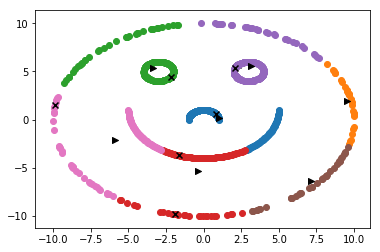

In [14]:
## Visualising kmeans++ for k = 7

np.random.seed(10)
k = 7

## Initialising the K_means++ class
cluster_plus = K_means_plus(k = 7)

## Training the cluster class 
result = cluster_plus.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "black")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

In the above visualisation, the different clusters obtained using K-means are represented with different colors. The means are shown with black triangle marker and the initial means are shown with a x mark, we can see the initialisation of mean is much better this time in the sense that means are initialised in different clusters to begin with. But still simple K-means algorithm searches for a linear decision boundary and hence it is unable to produce good results for this example, even with better initialisation strategies. 

### Part (c)

In this part we were asked to find the optimal value for number of clusters in the dataset. I will plot the loss values for different values of number of clusters (k) and try to find the elbow point which should work best for this example.  

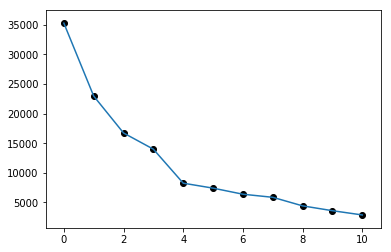

In [12]:
## Checking for cluster size 1 to 13 for simple k-means

errors = [] ## Array to store the errors
 
## Looping over different K and getting the losses
for i in range(1, 12):
    cluster = K_means(k = i)
    result = cluster.fit(X)
    loss = cluster.loss(X)
    errors.append(loss)
    
## Plotting the errors
plt.plot(errors)
for idx in range(0, 11):
    plt.scatter(idx, errors[idx], c = "black")

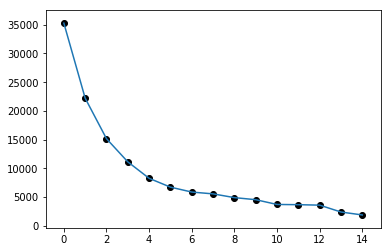

In [13]:
## Checking for cluster size 1 to 15 for KMeans++

errors = [] ## Array to store the errors

## Looping over different K and getting the losses
for i in range(1, 16):
    cluster = K_means_plus(k = i)
    result = cluster.fit(X)
    loss = cluster.loss(X)
    errors.append(loss)
    
## Plotting the errors
plt.plot(errors) 
for idx in range(0, 15):
    plt.scatter(idx, errors[idx], c = "black")

We can see that the graph from kmeans++ is smoother as compared to kmeans because of better initialisation. Hence, we will choose this graph to identify the cluster number which woks best with linear k-means. From the above graph, we can identify the elbow point to be k = 6 and hence this seems to be the best cluster number for this example. Let us visualise the clusters obtained using k = 6 now.

1861.7605081673423


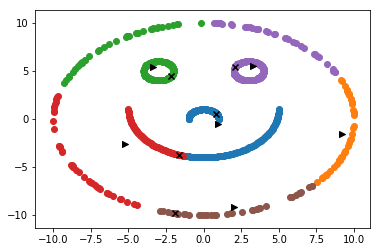

In [14]:
## Visualising kmeans++ for k = 6

np.random.seed(10)
k = 6

## Initialising the K_means++ class
cluster_plus = K_means_plus(k = 6)

## Training the cluster class 
result = cluster_plus.fit(X)

## Obtaining the saved means and assignments 
init_means = result[0]
means = result[1]
assignments = result[2]

## Plotting the obtained means and assignments
for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    plt.scatter(init_means[i][0], init_means[i][1], marker = "x", c = "black")
    plt.scatter(means[i][0], means[i][1], marker = ">", c = "black")
    
## Obtaining the final loss of clustering
loss = cluster.loss(X)
print(loss)

### Part (d)

In this part we were asked to implement the kernel k-means algorithm on this dataset. We know that simple k-means suffers from the problem of linear decision boundaries so we will resolve this using a non-linear feature mapping using RBF kernels. 

In [15]:
## Implementing Guassian Kernel K-means to cluster the dataset

class Guassian_Kmeans:
    
    ## Initialising the class
    def __init__(self, gamma = 0.1, k = 5, tol = 1e-8, max_iter = 3000):
        self.k = k
        self.tol = tol
        self.gamma = gamma
        self.max_iter = max_iter
        
    ## Function to calculate the value of Guassian kernel at any two arbitrary points x and y
    def Kernel(self, x, y):
        norm_sq = np.linalg.norm(x - y, 2)**2
        res = np.exp(-(norm_sq)*self.gamma)
        return res
    
    ## Function that returns the Gram Matrix or the Kernel matrix for the dataset X
    def Gram(self, X):
        n = X.shape[0]
        G = np.zeros((n, n))
        
        for i in range(n):
            for j in range(n):
                x = X[i] 
                y = X[j]
                norm_sq = (np.linalg.norm(x - y, 2))**2
                G[i][j] = np.exp(-(norm_sq)*self.gamma)
        
        self.G = G
        return G
    
    ## Function to train the model
    def fit(self, X):
        np.random.seed(10)
        n = X.shape[0]
        
        ## Obtaining the kernel matrix for the dataset X
        self.Gram(X)
        
        # Array to store the initial means
        means = []
        
        # Finding the means according to kmeans++ rule
        rnd = X[np.random.choice(np.arange(n))]
        means.append((rnd[0], rnd[1]))
                
        ## Array to store the distances for kmeans++
        distances = 1e9*np.ones((n, self.k))
        for i in range(1, self.k):
            probs = [] ## Array to store the probabilities associated with choosing each point
            
            ## Computing the distances of every datapoint with the most recent cluster mean
            for j in range(n):
                curr = X[j]
                
                ## Choosing distance in the new feature space as the criteria to initialise
                dist = 2 - 2*self.Kernel(curr, np.array([means[i-1][0], means[i-1][1]]))
                distances[j][i-1] = dist
                min_dist = np.min(distances[j])
                probs.append(min_dist)
                
            probs = probs / (np.sum(probs))
            
            ## Choosing the next mean according to the K-means++ rule
            next_rnd = X[np.random.choice(np.arange(n), p = probs)]
            means.append((next_rnd[0], next_rnd[1]))
        
        ## Array to store the assignment of data points to cluster
        assignments = -1*np.ones(n, dtype = np.int64)
        
        ## Initialising the cluster set using the means obtained
        for i in range(n):
                curr = X[i]
                minn = 1e9
                min_k = -1
                
                ## Iterating over the means to find the closest one
                for j in range(self.k):
                    mean_k = np.array([means[j][0], means[j][1]])
                    
                    ## Using distances in the kernel space to choose the assignment
                    dist = 2 - 2*self.Kernel(curr, mean_k)
                    if dist < minn:
                        minn = dist
                        min_k = j
                
                assignments[i] = min_k
        
        diff = 100
        iters = 0
        
        while (diff > self.tol and iters < self.max_iter):
            iters = iters + 1
            print("Started iteration: " + str(iters) + ". Current diff: " + str(diff))
                
            ## Copying the old assignments for checking convergence
            prev_assignments = assignments.copy()
            
            ## Array to store the values of K(mu_k, mu_k) [The second term in distance function]
            foo = np.zeros(self.k)
            
            ## Updating the values of foo by iterating over all points which belong to same cluster
            for i in range(self.k):
                for j in range(n):
                    for l in range(n):
                        if (assignments[j] == i and assignments[l] == i):
                            foo[i] = foo[i] + self.G[j][l]
            
            ## Assigning new clusters to the points 
            for i in range(n):
                curr = X[i]
                minn = 1e9
                min_k = -1
                
                ## Iterating over the clusters to find the closest one
                for j in range(self.k):
                    
                    ## Initialising dist with  K(x_n, x_n) [The first term in the distance equation]
                    dist = 1
                    temp = 0
                    count = 0
                    
                    ## Iterating over all the elements in cluster k for the third term in distance equation 
                    ## [K(x_n, x_i)]
                    for l in range(n):
                        if prev_assignments[l] == j:
                            count = count + 1
                            temp = temp + self.G[i][l]
                    
                    ## Dividing by appropriate factors and updating the distance
                    temp = temp / count
                    dist = dist - 2*temp + foo[j] / (count**2) 
                            
                    if dist < minn:
                        minn = dist
                        min_k = j
                
                ## Updating the new assignment of the point
                assignments[i] = min_k
            
            ## Checking for convergence
            diff = np.linalg.norm(assignments - prev_assignments, 2)
           
        ## Saving final means and assignmentes obtained
        print(iters, diff)
        self.assignments = assignments
        return assignments
     
    ## Function to compute the loss of clustering 
    def loss(self, X):
        loss = 0
        n = X.shape[0]
        k = self.k 
        assignments = self.assignments
        
        ## Array to store the values of K(mu_k, mu_k) [The second term in distance function]
        foo = np.zeros(self.k)

        ## Updating the values of foo by iterating over all points which belong to same cluster
        for i in range(self.k):
            for j in range(n):
                for l in range(n):
                    if (assignments[j] == i and assignments[l] == i):
                        foo[i] = foo[i] + self.G[j][l]
        
        ## Calculating the loss
        for i in range(n):
            
            ## Updating with  K(x_n, x_n) [The first term in the distance equation]
            loss = loss + 1
            temp = 0
            count = 0
            
            ## Computing the third term in the distance equation [K(x_n, x_i)]
            for j in range(n):
                if assignments[j] == assignments[i]:
                    count = count + 1
                    temp = temp + self.Kernel(X[i], X[j])
            
            ## Dividing by appropriate factors and updating the loss
            temp = temp / count
            loss = loss - 2*temp + foo[assignments[i]] / (count**2)
            
        return loss

We will now run the K-means with the guassian kernels. I have fixed the number of clusters to 5 since visually we can see the number of clusters to be 5 and hence we can expect to find all of them as separate clusters ideally. There is also a hyper parameter associated with the guassian kernel i.e. Gamma. I will try three values of gamma and show that finding appropriate gamma is important to get the required clustering. 

Note: I have tuned gamma using visual parameters only over here, since we know how the ideal clustering will look like for this case.

Started iteration: 1. Current diff: 100
Started iteration: 2. Current diff: 29.359836511806396
Started iteration: 3. Current diff: 24.124676163629637
Started iteration: 4. Current diff: 7.54983443527075
Started iteration: 5. Current diff: 8.426149773176359
Started iteration: 6. Current diff: 3.0
Started iteration: 7. Current diff: 3.1622776601683795
Started iteration: 8. Current diff: 3.4641016151377544
Started iteration: 9. Current diff: 3.7416573867739413
9 0.0
793.9668886347175


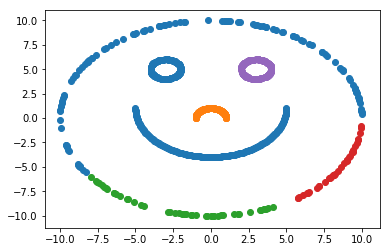

In [16]:
## Visualising Guassian Kmeans for k = 5 with gamma = 1 (very bad value)

k = 5

cluster = Guassian_Kmeans(gamma = 1)
result = cluster.fit(X)

assignments = result

for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    
loss = cluster.loss(X)
print(loss)

Started iteration: 1. Current diff: 100
Started iteration: 2. Current diff: 35.31288716601915
Started iteration: 3. Current diff: 15.362291495737216
Started iteration: 4. Current diff: 15.968719422671311
Started iteration: 5. Current diff: 13.784048752090222
Started iteration: 6. Current diff: 8.94427190999916
Started iteration: 7. Current diff: 7.14142842854285
Started iteration: 8. Current diff: 6.4031242374328485
Started iteration: 9. Current diff: 6.782329983125268
Started iteration: 10. Current diff: 7.416198487095663
Started iteration: 11. Current diff: 4.0
Started iteration: 12. Current diff: 3.4641016151377544
Started iteration: 13. Current diff: 3.4641016151377544
Started iteration: 14. Current diff: 3.4641016151377544
Started iteration: 15. Current diff: 3.4641016151377544
Started iteration: 16. Current diff: 4.0
Started iteration: 17. Current diff: 4.0
Started iteration: 18. Current diff: 4.47213595499958
Started iteration: 19. Current diff: 4.898979485566356
Started iterati

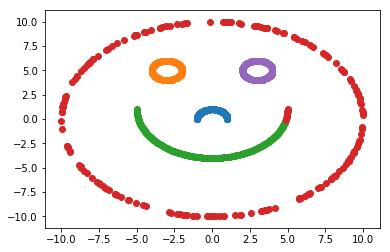

In [17]:
## Visualising Guassian Kmeans for k = 5 with gamma = 0.05 (another value)

k = 5

cluster = Guassian_Kmeans(gamma = 0.05)
result = cluster.fit(X)

assignments = result

for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    
loss = cluster.loss(X)
print(loss)

Started iteration: 1. Current diff: 100
Started iteration: 2. Current diff: 20.566963801203133
Started iteration: 3. Current diff: 30.854497241083024
Started iteration: 4. Current diff: 9.219544457292887
Started iteration: 5. Current diff: 6.244997998398398
Started iteration: 6. Current diff: 5.5677643628300215
Started iteration: 7. Current diff: 8.602325267042627
Started iteration: 8. Current diff: 9.273618495495704
Started iteration: 9. Current diff: 8.774964387392123
Started iteration: 10. Current diff: 8.246211251235321
Started iteration: 11. Current diff: 8.0
Started iteration: 12. Current diff: 8.0
Started iteration: 13. Current diff: 8.774964387392123
Started iteration: 14. Current diff: 12.96148139681572
Started iteration: 15. Current diff: 2.0
Started iteration: 16. Current diff: 2.23606797749979
Started iteration: 17. Current diff: 2.6457513110645907
Started iteration: 18. Current diff: 2.8284271247461903
Started iteration: 19. Current diff: 2.0
Started iteration: 20. Current

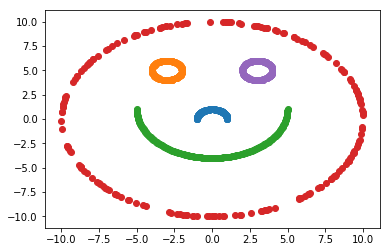

In [18]:
## Visualising Guassian Kmeans for k = 5 with gamma = 0.075 (best value)

k = 5

cluster = Guassian_Kmeans(gamma = 0.075)
result = cluster.fit(X)

assignments = result

for i in range(k):
    plt.scatter(X[assignments == i, 0], X[assignments == i, 1], label = i)
    
loss = cluster.loss(X)
print(loss)

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

## Part (a)

Assuming that we are given a set of points $X$ generated from the mixture of $K$ guassian clusters. We are also provided with the mixture weights $\{\pi_{k}\}$ and the nature of covariance matrices $\Sigma_{k}$. The only parameters left to estimate are $\mu_{k}$ and $\sigma_{k}$. We will do this using the EM-algorithm. 

First we set up the latent variables as $Z = \{z_{nk}\}_{k = 1 \dots K}$ where each of the $\{z_{nk}\}$ is a binary indicator which is 1 if $n^{th}$ example is from cluster $k$. For the sake of nomenclature, we take $\Theta = \{\pi_{k}, \mu_{k}, \Sigma_{k}\}$ where all except ${\mu_{k}}_{k = 1 \dots K}$ are known. We setup the EM-algorithm as below. 

First, we calculate the total log-likelihood of the observed and the latent data. 
$$L(X, Z | \Theta) = \prod_{n = 1}^{N} p(z_n | \Theta) \cdot p(x_n | z_n, \Theta)$$
$$L(X, Z | \Theta) = \prod_{n = 1}^{N} \prod_{k = 1}^{K} \pi_{k}^{z_{nk}} \cdot \prod_{k = 1}^{K} p(x_n | z_n = k, \Theta) ^ {z_{nk}}$$
$$L(X, Z | \Theta) = \prod_{n = 1}^{N} \prod_{k = 1}^{K} [\pi_{k} \cdot  p(x_n | z_n = k, \Theta)]^ {z_{nk}}$$

Now, we take the log-likelihood and obtain
$$\mathcal{L}(X, Z | \Theta) = \sum_{n = 1}^{N} \sum_{k = 1}^{K} z_{nk}[\log{\pi_{k}} + \log{\mathcal{N}(x_n | \mu_{k}, \Sigma_{k})}]$$

### E-step
In the E-step we first calculate the expectation of the log-likelihood under the distribution of $Z | X$. Now, notice that the expectation of $z_{nk}$ under the distribution $Z | X$ will be equal to the probability $p(z_n = k | x = x_n)$. We will user bayes theorem on this now to get
$$p(z_n = k | x = x_n) = \frac{p(x = x_n | z_n = k) \cdot p(z_n = k)}{p(x = x_n)}$$
$$p(z_n = k | x = x_n) \propto p(x = x_n | z_n = k) \cdot p(z_n = k)$$
$$p(z_n = k | x = x_n) \propto \mathcal{N}(x_n | \mu_{k}, \Sigma_{k}) \cdot \pi_{k}$$

For a fixed $n$, we also have that $\sum_{k = 1}^{K} p(z_n = k | x = x_n) = 1$ from the law of total probability. Hence, we obtain the proportionality constant for a particular $n$ as $\frac{1}{\sum_{k = 1}^{K}\mathcal{N}(x_n | \mu_{k}, \Sigma_{k}) \cdot \pi_{k}}$

Hence we obtain the expected value of $z_{nk}$ to be

$$E[z_{nk}] = \frac{\pi_{k} \cdot \mathcal{N}(x_n | \mu_{k}, \Sigma_{k})}{\sum_{k = 1}^{K}\pi_{k} \cdot \mathcal{N}(x_n | \mu_{k}, \Sigma_{k})}$$

Therefore we get the final value from the E-step as

$$E[\mathcal{L}(X, Z | \Theta)] = \sum_{n = 1}^{N} \sum_{k = 1}^{K} E[z_{nk}][\log{\pi_{k}} + \log{\mathcal{N}(x_n | \mu_{k}, \Sigma_{k})}]$$

with $E[z_{nk}]$ as obtained above. 

### M-step

In this step we will maximise the expectation obtained above. Writing completely the expectation we get

$$E[\mathcal{L}(X, Z | \Theta)] = \sum_{n = 1}^{N} \sum_{k = 1}^{K} E[z_{nk}][\log{\pi_{k}} + \log{c} - \frac{1}{2}(x_n - \mu_{k})^{T}(\Sigma_{k})^{-1}(x_n - \mu_{k})]$$

where c is the constant from the normal distribution.

In this step, our aim is to maximise this expectation with respect to $\{\mu_{k}\}$ and $\{\sigma_k\}$. Let's first do it wrt $\{\mu_k\}$. 

$$argmax_{\mu}\sum_{n = 1}^{N} \sum_{k = 1}^{K} E[z_{nk}][\log{\pi_{k}} + \log{c} - 1/2\cdot \log{|\Sigma_{k}|} - 1/2\cdot(x_n - \mu_{k})^{T}(\Sigma_{k})^{-1}(x_n - \mu_{k})]$$

Plugging in the value of $\Sigma_{k}$ above, we will get (assuming D dimensional data)
$$argmax_{\mu}\sum_{n = 1}^{N} \sum_{k = 1}^{K} E[z_{nk}][\log{\pi_{k}} + \log{c} - 1/2 \cdot (2D)\cdot \log{\sigma_{k}} - 1/2\cdot(x_n - \mu_{k})^{T}(\frac{1}{\sigma^2}I_{D})(x_n - \mu_{k})]$$
$$argmax_{\mu}\sum_{n = 1}^{N} \sum_{k = 1}^{K} E[z_{nk}][\log{\pi_{k}} + \log{c} - 1/(2\sigma^2)\cdot(x_n - \mu_{k})^{T}(x_n - \mu_{k})]$$

Differentiating with respect to $\mu_{k}$, we get
$$\sum_{i = 1}^{N} E[z_{nk}] \cdot [1/(2\sigma^2) \cdot (2x_{n} - 2\mu_{k})]$$

Differentiating again with respect to $\mu_{k}$ gives us 
$$\sum_{i = 1}^{N} -E[z_{nk}] \cdot [1/(2\sigma^2)] I_{D}$$

Since the double differentiation is a negative definite matrix the function to maximise is concave and hence maxima will be obtained by setting the first derivative to $0$. 

Hence we obtain $\mu_{k}$ by setting the derivative to be zero as follows

$$\mu_{k} = \frac{\sum_{n = 1}^{N} E[z_{nk}]x_n}{\sum_{n = 1}^{N} E[z_{nk}]}$$

Now, differentiating with respect to $\sigma_{k}$, we get
$$\sum_{n = 1}^{N} E[z_{nk}] \cdot [-\frac{D}{\sigma_k} + \frac{2}{2\sigma_{k}^3}(x_n - \mu_k)^{T}(x_n - \mu_k)]$$

Hence we obtain $\sigma_{k}$ by setting the derivative to be zero as follows

$$\sigma_{k}^2 = \frac{\sum_{n = 1}^{N} E[z_{nk}](x_n - \mu_k)^{T}(x_n - \mu_k)}{\sum_{n = 1}^{N} D\cdot E[z_{nk}]}$$

This completes the E-M step and we can repeat the following two steps till convergence. I will implement the following algorithm with the help of an example below.

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [23]:
## Custom function that generates the three clusters 
def generate_data():
    
    n = 1000 ## Total number of points
    sigma = np.array([0.5, 0.8, 1]) ## Sigma_k values for the clusters
    means = np.array([[7,10], [-5,4], [0,-7]]) ## Means of the clusters
    pi = np.array([0.35, 0.5, 0.15]) ## Probabilities associated with clusters
    
    ## Preparing the covariance matrix
    covs = [(sigma[0]*sigma[0])*np.identity(2), (sigma[1]*sigma[1])*np.identity(2), (sigma[2]*sigma[2])*np.identity(2)]
    
    ## Choosing points to go in clusters according to pi probabilities
    indices = np.random.choice(np.arange(3), n, p = pi)
    
    ## Generating random draws from multivariate normals for dataset 
    X = np.zeros([n,2])
    for i in range(n):
        X[i] = np.random.multivariate_normal(means[indices[i]], covs[indices[i]])
    
    plt.scatter(X[:,0], X[:,1], c = 'y')
    return X, means, pi, sigma

## Custom function to return the pdf of multivariate normal
def pdf_multivariate(x, mu, sigma):
    det = np.linalg.det(sigma)
    const = 1.0 / (np.power((2 * np.pi), float(len(x)/2) * np.power(det, 1.0/2)))
    x = (x - mu).reshape((1,2))
    inv = np.linalg.inv(sigma)
    res = np.exp(-0.5 * np.matmul(np.matmul(x, inv), x.T))
    return res

## Custom function that performs EM algorithm
def do_EM(X, params):
    pi = params[1]
    sigma = params[2]
    mu = params[0]
    
    stored_mu = []
    stored_mu.append(mu)
    
    ## Setting initial parameters for the algorithm
    tol = 1e-8
    max_iters = 1000
    diff = 100
    iters = 0
    K = len(pi)
    n = X.shape[0]
    
    while (iters < max_iters and diff > tol):
        iters = iters + 1
        
        ## Storing the values of parameters from previous iteration
        mu_old = mu.copy()
        sigma_old = sigma.copy()
        
        ## Matrix that stores E_{nk} values
        E = np.zeros((n, K))
        
        ## Filling up the matrix E
        for i in range(n):
            for j in range(K):
                E[i][j] = pi[j] * pdf_multivariate(X[i], mu[j], sigma[j] * np.identity(2))
                
        for i in range(n):
            E[i, :] = E[i, :] / sum(E[i, :])
            
        ## Updating the mu and sigma according to the M step
        new_mu = np.zeros((K, 2))
        new_sigma = np.zeros(K)
        for k in range(K):
            for i in range(n):
                new_mu[k] = new_mu[k] + E[i][k]*X[i]
                new_sigma[k] = new_sigma[k] + E[i][k]*np.matmul((X[i] - mu[k]).T, (X[i] - mu[k]))
                
            new_mu[k] = new_mu[k] / sum(E[:, k])
            new_sigma[k] = new_sigma[k] / (2*sum(E[:, k]))
            
        new_sigma = np.sqrt(new_sigma)
        
        ## Finding the error for stopping criteria 
        diff = np.linalg.norm(new_mu - mu_old) + np.linalg.norm(new_sigma - sigma_old)
        mu = new_mu
        sigma = new_sigma
        stored_mu.append(mu)
        
    return mu, sigma, np.array(stored_mu)

Means obtained are: 
[[ 6.94994564 10.05636586]
 [-4.98110081  3.97066317]
 [ 0.03704709 -7.14858141]]
---------------------------------
Sigma obtained are: 
[0.50063707 0.78615257 1.08363027]


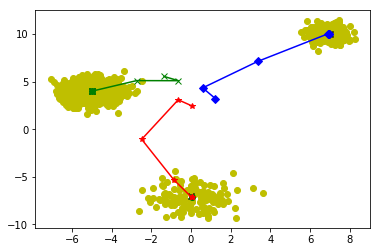

In [24]:
np.random.seed(5)

## Generating data
X, mu, pi, sigma = generate_data()

## Setting the initial means matrix from the dataset obtained
mu_initial = np.array([[np.mean(X[:, 0]), np.mean(X[:, 1])], 
                       [np.mean(X[:, 0]), np.mean(X[:, 1])], 
                       [np.mean(X[:, 0]), np.mean(X[:, 1])]])

## Setting the initial sigma values from the dataset obtained
var = np.var(X)
sigma_initial = np.array([var, var, var])

## Adding random noise to the means to make them different (As otherwise they would've converged to one place)
for i in range(3):
    mu_initial[i] = mu_initial[i] + np.random.multivariate_normal([0, 0], np.identity(2))

## Running the EM algo
params = (mu_initial, pi, sigma_initial)
mu_obtained, sigma_obtained, stored_mu = do_EM(X, params)
print("Means obtained are: ")
print(mu_obtained)
print("---------------------------------")
print("Sigma obtained are: ")
print(sigma_obtained)

## Plotting the final observations
markers = ["D", "x", "*"]
colors = ['b', 'g', 'r']

for i in range(3):
    plt.plot(stored_mu[:, i, 0], stored_mu[:, i, 1], marker = markers[i], c = colors[i])
    
plt.scatter(mu[:, 0], mu[:, 1], color = "black", marker = "x")
plt.scatter(mu_obtained[:, 0], mu_obtained[:, 1], color = 'green')

We can see that the EM algorithm works perfectly and finds the correct Means in this dataset. I have also printed the values of the Sigmas and they also approximately match with the actual ones used to generate the dataset ([0.5, 0.8, 1]). In the plot, I have shown the paths the means take to reach the corresponding cluster. Also, since the algorithm is sensitive to initialisation, I have initialised the means carefully using the means of the dataset and added a small guassian noise to distinguish among different clusters. Similarly for sigma, I have set their values to the variance of the dataset, which is also sensible for a starting value.